<a href="https://colab.research.google.com/github/shemi024/data-preprocessing/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#taking data from a url
url ='http://bit.ly/drinksbycountry'

In [ ]:
#convert data into tabular foemat
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [ ]:
#for column wise
pd.read_table(url, sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [ ]:
#loading data from other folder
data=pd.read_csv('/content/drive/MyDrive/beer-servings.csv')

In [ ]:
#problem bzc back slashes.it can change manually or
# data = pd.read_cvs('/content/drive/MyDrive/beer-servings.csv')
  #or
#data= pd.read_csv(r'/content/drive/MyDrive/beer-servings.csv')

In [ ]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
#check the data. we can see an additional column will present un the table.python defualt give an index to the dataset. to solve the problem
# data.drop('Unnamed:0',inplace=True, axis=1)
#or
data=pd.read_csv(r'/content/drive/MyDrive/beer-servings.csv', index_col='Unnamed: 0')
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
data.shape

(193, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [ ]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [ ]:
#to handle the missing values
#//filling missing values
#check the datatypes of the columns
data.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

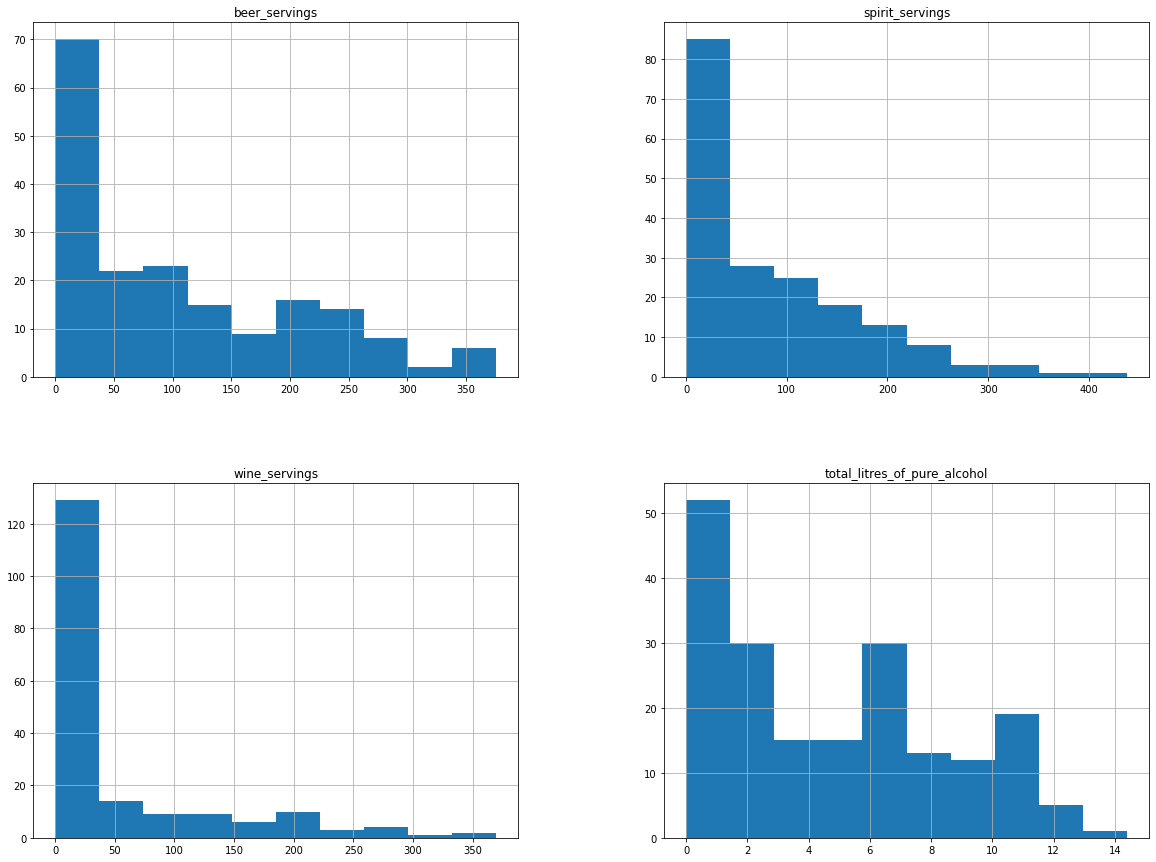

In [ ]:
dgraph = data.select_dtypes(include = ['float'])
dgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
data.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
data['beer_servings'] = data['beer_servings'].fillna(data['beer_servings'].median())
#check for the null value
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [ ]:
for i in ['spirit_servings', 'wine_servings',
          'total_litres_of_pure_alcohol']:
          data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [ ]:
from pandas.core.groupby import groupby
#take the men on her servings with respect to different continents
data.groupby('continent')['beer_servings'].mean() 

continent
Africa            61.471698
Asia              40.613636
Europe           190.822222
North America    145.434783
Oceania           89.687500
South America    137.000000
Name: beer_servings, dtype: float64

In [ ]:
#check the number of unique vqlues id presented in the country column
data.country.nunique()

193

In [ ]:
data.drop('country', axis=1, inplace=True)

In [ ]:
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0.0,0.0,0.0,0.0,Asia
1,89.0,132.0,54.0,4.9,Europe
2,25.0,0.0,14.0,0.7,Africa
3,245.0,138.0,312.0,12.4,Europe
4,217.0,57.0,45.0,5.9,Africa


Text(0.5, 1.0, 'BOX PLOT OF BEER SERVINGS')

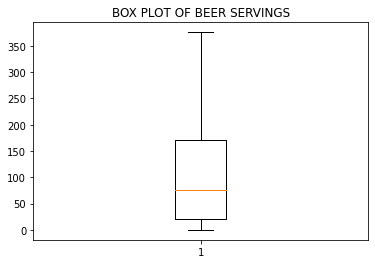

In [ ]:
 #Qutliers in beer_servings column
 plt.boxplot(data['beer_servings'])
 plt.title('BOX PLOT OF BEER SERVINGS')
 

Text(0.5, 1.0, 'BOX PLOT OF SPIRIT SERVINGS')

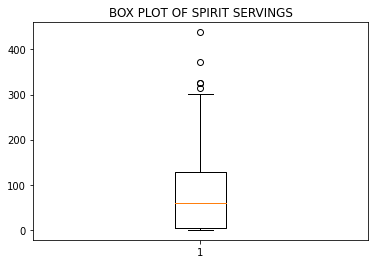

In [ ]:
plt.boxplot(data['spirit_servings'])
plt.title('BOX PLOT OF SPIRIT SERVINGS')

In [ ]:
q1=np.percentile(data['spirit_servings'],25, interpolation='midpoint')
q2=np.percentile(data['spirit_servings'],50, interpolation='midpoint')
q3=np.percentile(data['spirit_servings'],75, interpolation='midpoint')
print(q1)
print(q2)
print(q3)

5.0
60.0
128.0


In [ ]:
data['spirit_servings'].median()

60.0

In [ ]:
#inter quartile range
iqr= q3- q1
#from iqr, we can find the lower limits and the upper limit and we remove the value below the lower limit and above upper limits
low_limit= q1-1.5*iqr
up_limit= q3+1.5*iqr
print(low_limit)
print(up_limit)

-179.5
312.5


In [ ]:
#remove the value below  -179.5 and above 312.5
#for that
outlier =[]
for x in data['spirit_servings']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [ ]:
#find the index of outliers
ind1 =data['spirit_servings']>up_limit
data.loc[ind1].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [ ]:
#drop these index
data.drop([15, 68, 73, 141, 144], inplace=True)

Text(0.5, 1.0, 'box plot of beer servings')

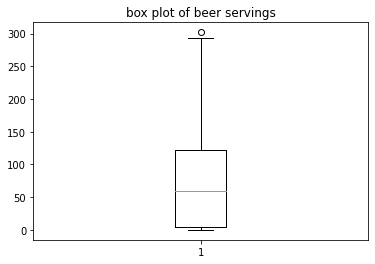

In [ ]:
#plot the spirit_serving column again
plt.boxplot(data['spirit_servings'])
plt.title('box plot of beer servings')

In [ ]:
q1=np.percentile(data['wine_servings'],25, interpolation='midpoint')
q2=np.percentile(data['wine_servings'],50, interpolation='midpoint')
q3=np.percentile(data['wine_servings'],75, interpolation='midpoint')
iqr = q3-q1
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr
print(low_limit)
print(up_limit)
 

-83.75
142.25


In [ ]:
outlier=[]
for x in data['wine_servings']:
  if((x>up_limit) or (x,low_limit)):
    outlier.append(x)

In [ ]:
outlier

[0.0,
 54.0,
 14.0,
 312.0,
 45.0,
 45.0,
 221.0,
 11.0,
 212.0,
 191.0,
 5.0,
 51.0,
 7.0,
 9.0,
 36.0,
 212.0,
 8.0,
 13.0,
 0.0,
 8.0,
 8.0,
 35.0,
 16.0,
 1.0,
 94.0,
 7.0,
 0.0,
 7.0,
 16.0,
 1.0,
 4.0,
 100.0,
 1.0,
 1.0,
 172.0,
 8.0,
 3.0,
 1.0,
 9.0,
 74.0,
 11.0,
 254.0,
 5.0,
 113.0,
 134.0,
 0.0,
 1.0,
 278.0,
 3.0,
 26.0,
 9.0,
 9.0,
 1.0,
 2.0,
 233.0,
 0.0,
 59.0,
 0.0,
 1.0,
 97.0,
 370.0,
 59.0,
 1.0,
 149.0,
 175.0,
 10.0,
 218.0,
 2.0,
 2.0,
 21.0,
 1.0,
 9.0,
 185.0,
 78.0,
 0.0,
 0.0,
 0.0,
 0.0,
 165.0,
 9.0,
 237.0,
 9.0,
 16.0,
 1.0,
 12.0,
 2.0,
 1.0,
 0.0,
 6.0,
 123.0,
 62.0,
 31.0,
 0.0,
 2.0,
 0.0,
 56.0,
 271.0,
 4.0,
 1.0,
 0.0,
 0.0,
 1.0,
 120.0,
 0.0,
 0.0,
 18.0,
 5.0,
 18.0,
 0.0,
 8.0,
 128.0,
 9.0,
 5.0,
 0.0,
 1.0,
 8.0,
 0.0,
 190.0,
 175.0,
 1.0,
 1.0,
 2.0,
 7.0,
 129.0,
 1.0,
 0.0,
 23.0,
 18.0,
 1.0,
 74.0,
 21.0,
 1.0,
 56.0,
 339.0,
 7.0,
 9.0,
 18.0,
 167.0,
 0.0,
 32.0,
 11.0,
 24.0,
 0.0,
 9.0,
 0.0,
 7.0,
 127.0,
 51.0,
 2.0,
 11.0,
 11

In [ ]:
ind1 =data['wine_servings']>up_limit
data.loc[ind1].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

In [ ]:
data.drop([ 3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185], inplace =True)

Text(0.5, 1.0, 'box plot of beer servings')

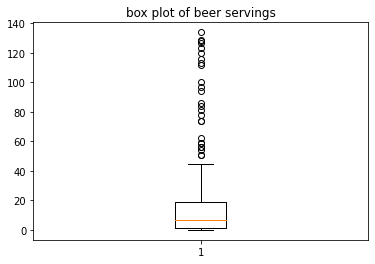

In [ ]:
#plot the wine_serving column again 
plt.boxplot(data['wine_servings'])
plt.title('box plot of beer servings')

Text(0.5, 1.0, 'box plot of total_litres_of_pure_alcohol')

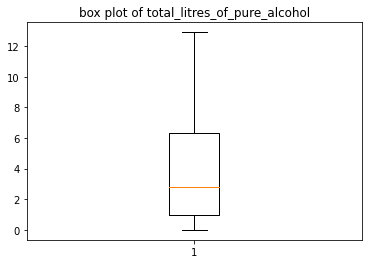

In [ ]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('box plot of total_litres_of_pure_alcohol')

In [ ]:
data.shape

(162, 5)

In [ ]:
data.continent.nunique()

6

In [ ]:
data=pd.get_dummies(data)
data.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,89.0,132.0,54.0,4.9,0,0,1,0,0,0
2,25.0,0.0,14.0,0.7,1,0,0,0,0,0
4,217.0,57.0,45.0,5.9,1,0,0,0,0,0
5,102.0,128.0,45.0,4.9,0,0,0,1,0,0


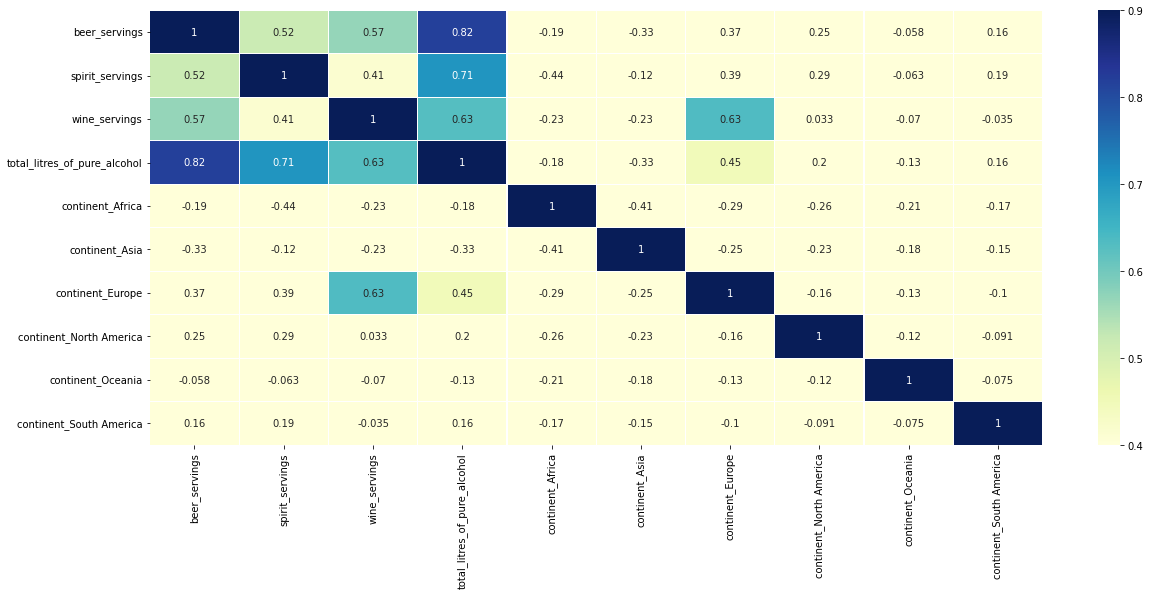

In [ ]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [ ]:
#split the dataset and create the model
data.columns
y=data['total_litres_of_pure_alcohol']
x=data.drop('total_litres_of_pure_alcohol', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.2)

In [ ]:
#create linear model
from sklearn import linear_model
lr=linear_model.LinearRegression()
model = lr.fit(x_train,y_train)
prediction= model.predict(x_test)

In [ ]:
# check the mse
from sklearn.metrics import mean_squared_error
print('MSE IS:', mean_squared_error(y_test,prediction))

MSE IS: 1.4107151984592194


In [ ]:
#r2 ede value
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,prediction))


R squared value is : 0.8413520664385032


In [ ]:
#check the details of the datasset
# data.shape
# feature scaling
#standard scaling
# scaling is done on features
x.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
X=standards.fit_transform(x)

In [ ]:
X = pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8
count,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02
mean,-4.403199e-17,-1.117076e-16,9.594520e-18,6.579099e-17,-1.672188e-16,5.962309e-17,1.706454e-16,3.289550e-16,-6.304970e-17
std,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00
min,-9.445129e-01,-9.137362e-01,-6.199137e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
25%,-7.563577e-01,-8.757907e-01,-5.898190e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
50%,-3.500515e-01,-3.698512e-01,-4.092508e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
75%,4.407457e-01,6.135688e-01,-5.563805e-02,1.454436e+00,1.663563e+00,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
max,3.156725e+00,2.906107e+00,3.412777e+00,1.454436e+00,1.663563e+00,2.397916e+00,2.664583e+00,3.251373e+00,4.123106e+00


In [ ]:
#again create a linear regression model
X_train,X_test,y_train,y_test =train_test_split(X,y, random_state=42, test_size=0.2)
lr= linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))


MSE IS: 1.4107151984592208
R squared value is: 0.841352066438503


In [ ]:
#min-max scaling
# we change the feature set x by standard scaling. again take x from the dataset
X=data.drop('total_litres_of_pure_alcohol', axis=1)
X.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#again create a linear regression model
#again create a linear regression model
X_train,X_test,y_train,y_test =train_test_split(X,y, random_state=42, test_size=0.2)
lr= linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))



MSE IS: 1.4107151984592194
R squared value is: 0.8413520664385032


In [ ]:
#NORMALIZATION
#normalization is also done in the feature set. so again load the feature set x
X=data.drop('total_litres_of_pure_alcohol', axis=1)
X.describe()

,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X = preprocessing.normalize(X)

In [ ]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.648990,0.475226,0.143663,0.031865,0.046742,0.012995,0.000695,0.007435,0.000298
std,0.325793,0.343203,0.181514,0.138976,0.190563,0.110713,0.002087,0.078627,0.001315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.404680,0.148553,0.017131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.756581,0.497608,0.068452,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.940029,0.795130,0.208306,0.010918,0.004366,0.000000,0.000000,0.000000,0.000000
max,0.999961,0.996860,0.917663,1.000000,1.000000,1.000000,0.011570,1.000000,0.009300


In [ ]:
# craete a linear regression model
#again create a linear regression model
X_train,X_test,y_train,y_test =train_test_split(X,y, random_state=42, test_size=0.2)
lr= linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))
#we get negative value in r2ed value. so the normalization is not good for this dataset.
#it is good to be use in classification algorithm

MSE IS: 9.955758447853306
R squared value is: -0.11961684861297694


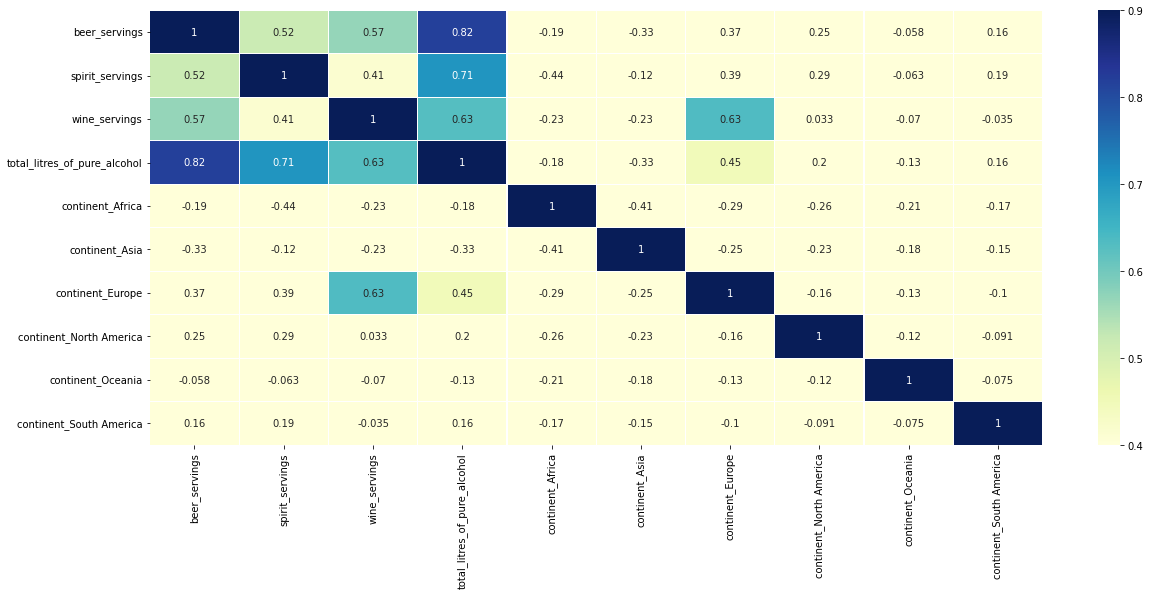

In [ ]:
from IPython.core.pylabtools import figsize
# feature reduction
# and check the model is improving
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=0.4, vmax=0.9, annot=True, linewidths=0.2, cmap='YlGnBu')

In [ ]:
#here the spirit_serving colimn and the wine_sserving column has high correlation with the beer_servings column
#we can remove those two columns
data.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [ ]:
#drop the column with high correlation
data.drop(['spirit_servings','wine_servings'], axis=1, inplace=True)

In [ ]:
#again create a linear regression model
y=data['total_litres_of_pure_alcohol']
X=data.drop('total_litres_of_pure_alcohol',axis=1)
X_train,X_test,y_train,y_test =train_test_split(X,y, random_state=42, test_size=0.2)
lr= linear_model.LinearRegression()
model = lr.fit(X_train,y_train)
prediction = model.predict(X_test)
print('MSE IS:',mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))


MSE IS: 2.78429780824533
R squared value is: 0.6868800349068506


In [ ]:
#merging
df1= pd.DataFrame({"Anu":[80,95,65,32,105],
                   "manju":[87,45,12,64,45],
                   "abcd":[36,44,56,91,50]},
                  index=[2009,2010,2011,2012,2013])

In [ ]:
df2 = pd.DataFrame({"Anu":[80,95,65,32,105],
                    "abc":[36,44,56,91,50],
                    "xyz":[87,45,12,64,45]},
                   index=[2005,2006,2007,2008,2009])

In [ ]:
pd.merge(df1, df2, on ='Anu')

,Anu,manju,abcd,abc,xyz
0,80,87,36,36,87
1,95,45,44,44,45
2,65,12,56,56,12
3,32,64,91,91,64
4,105,45,50,50,45


In [ ]:
#joining
df3= pd.DataFrame({"Anu":[80,95,65,32,105],
                   "def":[87,45,12,64,45],
                   "ghi":[36,44,56,91,50]})

In [ ]:
df4= pd.DataFrame({"klm":[45,23,65,12,100],
                   "abc":[88,56,78,96,20],
                   "xyz":[12,56,78,95,111]})

In [ ]:
join_data = df3.join(df4)

In [ ]:
join_data

,Anu,def,ghi,klm,abc,xyz
0,80,87,36,45,88,12
1,95,45,44,23,56,56
2,65,12,56,65,78,78
3,32,64,91,12,96,95
4,105,45,50,100,20,111


In [ ]:
#concatenation
df5 =pd.DataFrame({"Anu":[12,45,63,12,78],
                   "uvw":[65,13,45,78,65],
                   "qrs":[78,95,65,45,14]})

In [ ]:
cancat_data = pd.concat([df4,df5], axis= 1)

In [ ]:
cancat_data

,klm,abc,xyz,Anu,uvw,qrs
0,45,88,12,12,65,78
1,23,56,56,45,13,95
2,65,78,78,63,45,65
3,12,96,95,12,78,45
4,100,20,111,78,65,14
